In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
toxic_only_train_shortlisted = pd.read_pickle('./toxic_only_train_shortlisted_preprocessed.pkl')

In [3]:
toxic_only_train_shortlisted

,comment_text,target,preprocessed_text
4,haha you guys are a bunch of losers.,Disability,haha guy bunch loser
5,ur a sh*tty comment.,None,ur sh * tty comment
13,It's ridiculous that these guys are being call...,None,ridiculous guy called protester armed threat v...
14,This story gets more ridiculous by the hour! A...,None,story get ridiculous hour love people sending ...
19,"Angry trolls, misogynists and Racists"", oh my....",None,angry troll misogynist racist oh take 150 iq s...
...,...,...,...
1804825,Who is the jerk in the last row between the C ...,None,jerk last row c e
1804838,Nobody really cares that she supports the scie...,None,nobody really care support science behind glob...
1804856,Believing in God or not believing in God are p...,Religion,believing god believing god position held mill...
1804857,"I take your point, but I think you're shooting...",None,take point think shooting messenger police enf...


In [4]:
# preprocess text
# keep asterisks as they may be used to censor vulgar words

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
import nltk
import re

# nltk.download('wordnet')
stop_words = stopwords.words('english')
stop_words.extend(['com', 'http', 'wwww', 'like', 'say', 'need', 'good', 'want', 'people', 'know', 'right', 'make', 'thing'])
lemmatizer = WordNetLemmatizer()
# print(stop_words)

def preprocesstext(text):
    text = text.lower() # convert everything to lower case first
    text = re.sub('(?:(?!\*)(?!\*)(?![a-zA-Z0-9]).)', ' ', text) # Removes special characters (except asterisk) and punctuations
    words = word_tokenize(text)
    words_without_stopwords = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stop_words]
    text = " ".join(words_without_stopwords)
    return text

In [5]:
toxic_only_train_shortlisted["preprocessed_text"] = toxic_only_train_shortlisted["comment_text"].apply(preprocesstext)

# LDA (Task 2)

In [6]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation


C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['trump', 'stupid', 'time', 'think', 'white', 'year', 'country', 'way', 'woman', 'idiot', 'president', 'really', 'black', 'american', 'liberal', 'state', 'going', 'racist', 'man', 'comment']


C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


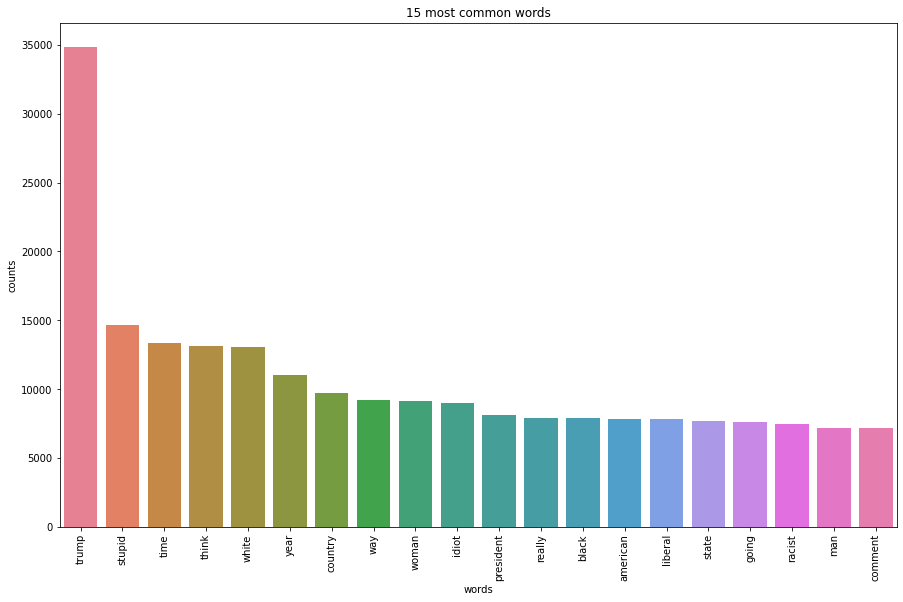

In [7]:
# # Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='15 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
#     plt.show()
    print(words)

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(toxic_only_train_shortlisted['preprocessed_text'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [8]:
lda_preprocessed_comments = toxic_only_train_shortlisted['preprocessed_text']

In [9]:
tokenized_docs = [word_tokenize(doc) for doc in lda_preprocessed_comments]

In [10]:
tokenized_docs

[['haha', 'guy', 'bunch', 'loser'],
 ['ur', 'sh', '*', 'tty', 'comment'],
 ['ridiculous',
  'guy',
  'called',
  'protester',
  'armed',
  'threat',
  'violence',
  'make',
  'terrorist'],
 ['story',
  'get',
  'ridiculous',
  'hour',
  'love',
  'sending',
  'guy',
  'dildo',
  'mail',
  'really',
  'think',
  'happy',
  'ending',
  'think',
  'even',
  'deluded',
  'joke',
  'assume'],
 ['angry',
  'troll',
  'misogynist',
  'racist',
  'oh',
  'take',
  '150',
  'iq',
  'see',
  'slant',
  'diversity',
  'diode',
  'work',
  'yet',
  'anything',
  'diversity',
  'hand',
  'must',
  'allow',
  'winning',
  'argument',
  'member',
  'diversity',
  'considered',
  'offensive',
  'language',
  'fact',
  'cogent',
  'linear',
  'post',
  'math',
  'verboten'],
 ['yet',
  'call',
  'muslim',
  'act',
  'get',
  'pilloried',
  'okay',
  'smear',
  'entire',
  'religion',
  'idiot',
  'okay',
  'bash',
  'christian',
  'sect'],
 ['bitch', 'nut', 'would', 'read', 'book', 'woman'],
 ['tuesday

## Sklearn LDA

In [11]:
lda_preprocessed_comments

4                                       haha guy bunch loser
5                                        ur sh * tty comment
13         ridiculous guy called protester armed threat v...
14         story get ridiculous hour love sending guy dil...
19         angry troll misogynist racist oh take 150 iq s...
                                 ...                        
1804825                                    jerk last row c e
1804838    nobody really care support science behind glob...
1804856    believing god believing god position held mill...
1804857    take point think shooting messenger police enf...
1804872    anyone quoted following exchange even apocryph...
Name: preprocessed_text, Length: 144334, dtype: object

In [343]:
# Count numerical representation
count_vectoriser = CountVectorizer()
lda_count_vecs = count_vectoriser.fit_transform(list(lda_preprocessed_comments))

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
vocab_list = np.array([x for x in count_vectoriser.vocabulary_.keys()])

In [14]:
count_vectoriser.vocabulary_.keys()

dict_keys(['haha', 'guy', 'bunch', 'loser', 'ur', 'sh', 'tty', 'comment', 'ridiculous', 'called', 'protester', 'armed', 'threat', 'violence', 'make', 'terrorist', 'story', 'get', 'hour', 'love', 'sending', 'dildo', 'mail', 'really', 'think', 'happy', 'ending', 'even', 'deluded', 'joke', 'assume', 'angry', 'troll', 'misogynist', 'racist', 'oh', 'take', '150', 'iq', 'see', 'slant', 'diversity', 'diode', 'work', 'yet', 'anything', 'hand', 'must', 'allow', 'winning', 'argument', 'member', 'considered', 'offensive', 'language', 'fact', 'cogent', 'linear', 'post', 'math', 'verboten', 'call', 'muslim', 'act', 'pilloried', 'okay', 'smear', 'entire', 'religion', 'idiot', 'bash', 'christian', 'sect', 'bitch', 'nut', 'would', 'read', 'book', 'woman', 'tuesday', 'jan', '13', 'socalled', 'militia', 'traveled', 'john', 'day', 'try', 'enlist', 'sherif', 'come', 'malheur', 'support', 'refused', 'go', 'without', 'approval', 'local', 'sheriff', 'burn', 'dave', 'ward', 'said', 'wanted', 'willing', 'shame

In [15]:
lda_preprocessed_comments.values

array(['haha guy bunch loser', 'ur sh * tty comment',
       'ridiculous guy called protester armed threat violence make terrorist',
       ...,
       'believing god believing god position held million intelligent payette think idiot believe god majority canadian atheist position legitimate may even correct idea god real mocking theist simply believing divine element creation appropriate unifying head state country imagine said believe indigenous people actually still believe land sacred come great spirit position believing indigenous spirituality totally legitimate would horrified tone',
       'take point think shooting messenger police enforce law however well badly politician establish law look crap harper ignoramus government inflicted u regarding topic',
       'anyone quoted following exchange even apocryphal would received vote bessie braddock winston drunk disgustingly drunk winston churchill bessie dear ugly disgustingly ugly tomorrow shall sober still disgustingly ugly'],
 

In [ ]:
# sklearn_lda = LatentDirichletAllocation(n_components=8, learning_method='online', n_jobs = 1)




In [17]:
# lda_output = sklearn_lda.fit_transform(lda_count_vecs)

In [18]:
# sklearn_lda.perplexity(lda_count_vecs)

In [28]:
import datetime
print(datetime.datetime.now())

2022-04-02 14:03:42.017642


In [29]:
# Can take a long time to run. In this case we are going to k_max=14.


from gensim.models import CoherenceModel
import tmtoolkit

sklearn_model_list = []
sklearn_perplexity_values = []
sklearn_model_topics = []
sklearn_coherence_values= []

for num_topics in range(2, 20, 2):
    sklearn_lda_x = LatentDirichletAllocation(n_components=num_topics, learning_method='online', n_jobs = 1)
    output_x = sklearn_lda_x.fit_transform(lda_count_vecs)
    sklearn_model_topics.append(num_topics)
    sklearn_model_list.append(sklearn_lda_x)
    perplexity_x = sklearn_lda_x.perplexity(lda_count_vecs)
    sklearn_perplexity_values.append(perplexity_x)
    coherence_x = tmtoolkit.topicmod.evaluate.metric_coherence_gensim(measure='c_v', 
                        top_n=25, 
                        topic_word_distrib=sklearn_lda_x.components_, 
                        dtm=output_x,
                        vocab=vocab_list, 
                        texts=tokenized_docs,
                        return_mean = True)
    sklearn_coherence_values.append(coherence_x)
    print("#Topics: " + str(num_topics) + ", Perplexity Score: " + str(perplexity_x) + ", Coherence Score: " + str(coherence_x))


#Topics: 2, Perplexity Score: 4765.949263284213, Coherence Score: 0.8400855729988239
#Topics: 4, Perplexity Score: 4999.306402889555, Coherence Score: 0.829290280648342
#Topics: 6, Perplexity Score: 5504.755036099647, Coherence Score: 0.8222662728958371
#Topics: 8, Perplexity Score: 5864.726489073254, Coherence Score: 0.8150022436300127
#Topics: 10, Perplexity Score: 6126.711703351146, Coherence Score: 0.7978184220730696
#Topics: 12, Perplexity Score: 6402.685367312207, Coherence Score: 0.7865223622382361
#Topics: 14, Perplexity Score: 6723.5559088038935, Coherence Score: 0.7862233852249995
#Topics: 16, Perplexity Score: 6927.828228928202, Coherence Score: 0.7833469352716536
#Topics: 18, Perplexity Score: 7327.70625614879, Coherence Score: 0.7786958544023457


print(datetime.datetime.now())

In [87]:
sklearn_model_topics

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[2, 4, 6, 8, 10, 12, 14, 16, 18]

## sklearn 5 topics

In [148]:
num_topics = 5
sklearn_lda_x = LatentDirichletAllocation(n_components=num_topics, learning_method='online', n_jobs = 1)
output_x = sklearn_lda_x.fit_transform(lda_count_vecs)
# sklearn_model_topics.append(num_topics)
# sklearn_model_list.append(sklearn_lda_x)
perplexity_x = sklearn_lda_x.perplexity(lda_count_vecs)
# sklearn_perplexity_values.append(perplexity_x)
coherence_x = tmtoolkit.topicmod.evaluate.metric_coherence_gensim(measure='c_v', 
                    top_n=25, 
                    topic_word_distrib=sklearn_lda_x.components_, 
                    dtm=output_x,
                    vocab=vocab_list, 
                    texts=tokenized_docs,
                    return_mean = True)
# sklearn_coherence_values.append(coherence_x)
print("#Topics: " + str(num_topics) + ", Perplexity Score: " + str(perplexity_x) + ", Coherence Score: " + str(coherence_x))

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Topics: 5, Perplexity Score: 5235.131372792414, Coherence Score: 0.8268084661932591


## sklearn 7 topics

In [90]:
num_topics = 7
sklearn_lda_x2 = LatentDirichletAllocation(n_components=num_topics, learning_method='online', n_jobs = 1)
output_x2 = sklearn_lda_x2.fit_transform(lda_count_vecs)
# sklearn_model_topics.append(num_topics)
# sklearn_model_list.append(sklearn_lda_x2)
perplexity_x2 = sklearn_lda_x2.perplexity(lda_count_vecs)
# sklearn_perplexity_values.append(perplexity_x2)
coherence_x2 = tmtoolkit.topicmod.evaluate.metric_coherence_gensim(measure='c_v', 
                    top_n=25, 
                    topic_word_distrib=sklearn_lda_x2.components_, 
                    dtm=output_x2,
                    vocab=vocab_list, 
                    texts=tokenized_docs,
                    return_mean = True)
# sklearn_coherence_values.append(coherence_x2)
print("#Topics: " + str(num_topics) + ", Perplexity Score: " + str(perplexity_x2) + ", Coherence Score: " + str(coherence_x2))

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Topics: 7, Perplexity Score: 5620.299791832089, Coherence Score: 0.8180752860590598


C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


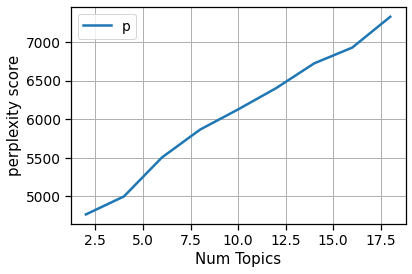

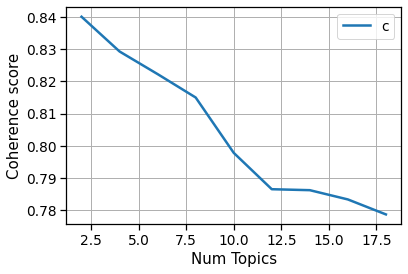

In [88]:
import matplotlib.pyplot as plt

limit=20; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, sklearn_perplexity_values)
plt.xlabel("Num Topics")
plt.ylabel("perplexity score")
plt.legend(("perplexity_values"), loc='best')
plt.grid()
plt.show()
limit=20; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, sklearn_coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.grid()
plt.show()

In [40]:
#Set up the environment to display the graphical outputs
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [344]:
# Generate the visuals
visual = pyLDAvis.sklearn.prepare(selected_lda_model, lda_count_vecs, count_vectoriser, mds='tsne')

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change fro

In [345]:
visual

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
5       1.465019 -47.625065       1        1  26.956356
0      54.854797 -36.476795       2        1  20.615246
3      32.212929 -61.444572       3        1  19.558184
2       5.111096 -14.110332       4        1  12.488139
4      26.350170 -33.374702       5        1  10.308226
1      38.109818  -7.222781       6        1  10.073848, topic_info=          Term          Freq         Total Category  logprob  loglift
65699    trump  33941.000000  33941.000000  Default  30.0000  30.0000
15558  country   9890.000000   9890.000000  Default  29.0000  29.0000
70194    white  13584.000000  13584.000000  Default  28.0000  28.0000
8581     black   8424.000000   8424.000000  Default  27.0000  27.0000
70818    woman   8805.000000   8805.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
26315     full   1338.501699   1996.829118   Topic6  -5.5699   1.8952
65258    trash   1240.342692   1727.635468   Topic6  -5.6460   1.9639
10980     call   1471.655837   3916.347416   Topic6  -5.4750   1.3165
31831    idiot   1709.744645   8960.698117   Topic6  -5.3251   0.6387
4307   america   1340.318938   4866.019152   Topic6  -5.5685   1.0059

[339 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
1551       2  0.999121      50
2582       4  0.999012   abuse
2842       4  0.381991     act
2842       5  0.617532     act
2849       3  0.999479  action
...      ...       ...     ...
71513      1  0.430238    year
71513      2  0.458106    year
71513      4  0.111472    year
71513      5  0.000191    year
71695      4  0.999535   young

[481 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 4, 3, 5, 2])

In [341]:
#Save the output|to the html file
pyLDAvis.save_html(visual, "topic_viz_sklearn.html")

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Gensim LDA

In [58]:
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora, models
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
def lda_preprocess(text):
    result = []
    for token in simple_preprocess(text):
        if token not in STOPWORDS:
            result.append(token)
    return result

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [60]:
gensim_lda_preprocessed_comments = toxic_only_train_shortlisted['preprocessed_text'].map(lda_preprocess)

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
dictionary = corpora.Dictionary(gensim_lda_preprocessed_comments)
dictionary.filter_extremes(no_below=10, no_above=0.5, keep_n=75000)

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [66]:
bow_corpus = [dictionary.doc2bow(doc) for doc in gensim_lda_preprocessed_comments]

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [70]:
# find optimal k (no. of topics) and plot graph visually

from gensim.models import CoherenceModel

model_list = []
perplexity_values = []
coherence_values = []
model_topics = []

for i in range(2, 20, 2):
    print("--------Topics: " + str(i) +'----------')
    lda_model = models.LdaMulticore(bow_corpus, num_topics=i,id2word=dictionary, passes=2, workers=2)
#     lda_model.fit_transform(bow_corpus)
    model_topics.append(i)
    model_list.append(lda_model)
    perplexity_cal = np.exp(-1. * lda_model.log_perplexity(bow_corpus))
    perplexity_values.append(perplexity_cal)
    print("#Topics: " + str(i) + ", Perplexity Score: " + str(perplexity_cal))
    coherence_model_lda = models.CoherenceModel(model=lda_model, texts=gensim_lda_preprocessed_comments,dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)
    print("#Topics: " + str(i) + ', Coherence Score: ', coherence_lda)


C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


--------Topics: 2----------
#Topics: 2, Perplexity Score: 3851.402846058253
#Topics: 2, Coherence Score:  0.3277391878978936
--------Topics: 4----------
#Topics: 4, Perplexity Score: 3939.1555416050073
#Topics: 4, Coherence Score:  0.4117007265432181
--------Topics: 6----------
#Topics: 6, Perplexity Score: 3976.7452746712875
#Topics: 6, Coherence Score:  0.5198570929973215
--------Topics: 8----------
#Topics: 8, Perplexity Score: 4174.283653316528
#Topics: 8, Coherence Score:  0.484986700743307
--------Topics: 10----------
#Topics: 10, Perplexity Score: 4912.7536392179945
#Topics: 10, Coherence Score:  0.5209893460689009
--------Topics: 12----------
#Topics: 12, Perplexity Score: 5946.055192269596
#Topics: 12, Coherence Score:  0.4934202588664001
--------Topics: 14----------
#Topics: 14, Perplexity Score: 6548.8981092828935
#Topics: 14, Coherence Score:  0.5626642492549141
--------Topics: 16----------
#Topics: 16, Perplexity Score: 7437.022447182013
#Topics: 16, Coherence Score:  0.52

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


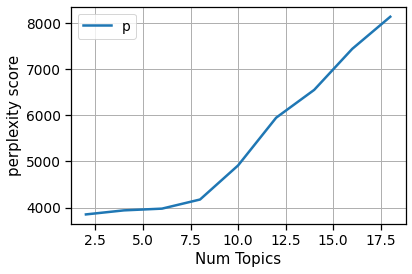

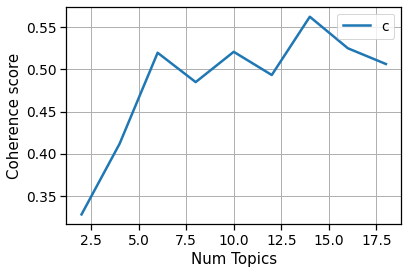

In [72]:
import matplotlib.pyplot as plt

limit=20; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, perplexity_values)
plt.xlabel("Num Topics")
plt.ylabel("perplexity score")
plt.legend(("perplexity_values"), loc='best')
plt.grid()
plt.show()
limit=20; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.grid()
plt.show()

In [99]:
# Generate the visuals
visual = pyLDAvis.gensim_models.prepare(model_list[2], bow_corpus, dictionary = model_list[2].id2word, mds='tsne')

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change fro

In [100]:
visual

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
5       1.465019 -47.625065       1        1  18.683190
3      54.854797 -36.476795       2        1  18.086962
2      32.212929 -61.444572       3        1  16.837190
1       5.111096 -14.110332       4        1  15.651846
0      26.350170 -33.374702       5        1  15.491919
4      38.109818  -7.222781       6        1  15.248894, topic_info=        Term          Freq         Total Category  logprob  loglift
457    trump  34347.000000  34347.000000  Default  30.0000  30.0000
157    white  14489.000000  14489.000000  Default  29.0000  29.0000
928    black   9565.000000   9565.000000  Default  28.0000  28.0000
62     woman   8970.000000   8970.000000  Default  27.0000  27.0000
758      tax   6423.000000   6423.000000  Default  26.0000  26.0000
...      ...           ...           ...      ...      ...      ...
1148     let   1621.271506   6839.603054   Topic6  -5.6133   0.4411
129    going   1664.936077   7660.758318   Topic6  -5.5867   0.3543
988      man   1376.180531   6777.447273   Topic6  -5.7772   0.2864
343      bad   1234.399129   4501.802572   Topic6  -5.8859   0.5868
685   better   1146.050100   5185.947854   Topic6  -5.9602   0.3710

[540 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
12943      5  0.987595  aboriginal
2721       1  0.002461    abortion
2721       2  0.001231    abortion
2721       3  0.001231    abortion
2721       4  0.990723    abortion
...      ...       ...         ...
110        3  0.059897        year
110        4  0.051463        year
110        5  0.118164        year
110        6  0.285875        year
4716       3  0.993724       youtu

[1649 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 3, 2, 1, 5])

In [70]:
# test_coherence = tmtoolkit.topicmod.evaluate.metric_coherence_gensim(measure='c_v', 
#                         top_n=25, 
# #                         topic_word_distrib=lda_model.get_topics(), 
# #                         dtm=lda_output,
#                         gensim_model = lda_model,
#                         gensim_corpus = dictionary,
# #                         vocab=np.array([x for x in count_vectoriser.vocabulary_.keys()]),  
#                         texts=tokenized_docs,
# #                         return_coh_model = True,
#                         return_mean = True)

# # coherence = test_coherence.get_coherence()

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Final sklearn LDA - 6 topics

In [151]:
num_topics = 6
sklearn_lda_x3 = LatentDirichletAllocation(n_components=num_topics, learning_method='online', n_jobs = 1, random_state = 42)
output_x3 = sklearn_lda_x3.fit_transform(lda_count_vecs)
# sklearn_model_topics.append(num_topics)
# sklearn_model_list.append(sklearn_lda_x3)
perplexity_x3 = sklearn_lda_x3.perplexity(lda_count_vecs)
# sklearn_perplexity_values.append(perplexity_x3)
coherence_x3 = tmtoolkit.topicmod.evaluate.metric_coherence_gensim(measure='c_v', 
                    top_n=25, 
                    topic_word_distrib=sklearn_lda_x3.components_, 
                    dtm=output_x3,
                    vocab=vocab_list, 
                    texts=tokenized_docs,
                    return_mean = True)
# sklearn_coherence_values.append(coherence_x3)
print("#Topics: " + str(num_topics) + ", Perplexity Score: " + str(perplexity_x3) + ", Coherence Score: " + str(coherence_x3))

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Topics: 6, Perplexity Score: 5492.096829862957, Coherence Score: 0.8166816831328085


In [155]:
selected_lda_model = sklearn_lda_x3

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [104]:
for x, topic in enumerate(selected_lda_model.components_):
    print("topic", x)
    print(topic)

topic 0
[0.16773699 0.16755917 0.16722584 ... 0.16731913 0.16667366 0.16667534]
topic 1
[0.16750666 0.16795976 0.16733846 ... 0.16705132 0.16667179 0.17027409]
topic 2
[1.85703214e+02 1.67687783e-01 1.67106197e-01 ... 1.67671084e-01
 1.75607307e-01 1.66677123e-01]
topic 3
[0.16792815 0.16752754 0.16706142 ... 0.16856421 0.17956606 0.17050334]
topic 4
[1.71611226e-01 1.39750353e+03 4.56365167e+00 ... 2.87774019e+00
 1.62111191e+00 1.19562915e+00]
topic 5
[0.16896431 0.16802869 0.16775031 ... 0.16826894 0.16667158 0.16667251]


C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [161]:
lda_output = selected_lda_model.transform(lda_count_vecs)

# column names
topicnames = ["Topic" + str(i) for i in range(sklearn_lda_x3.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(lda_preprocessed_comments))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 5), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
num_doc_to_show = 10  # change this to display the number of documents shown below
df_document_topics = df_document_topic.head(num_doc_to_show).style.applymap(color_green).applymap(make_bold)
df_document_topics

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,dominant_topic
Doc0,0.033640,0.033500,0.033550,0.832110,0.033330,0.033860,3
Doc1,0.033620,0.033330,0.433250,0.233080,0.233390,0.033330,2
Doc2,0.016740,0.016680,0.016760,0.788310,0.144800,0.016710,3
Doc3,0.008850,0.008780,0.125510,0.008850,0.008780,0.839230,5
Doc4,0.053840,0.005140,0.067300,0.259560,0.005070,0.609110,5
Doc5,0.010520,0.134530,0.010500,0.010450,0.727490,0.106510,4
Doc6,0.023860,0.023810,0.024360,0.446440,0.023820,0.457710,5
Doc7,0.089560,0.002170,0.002180,0.002170,0.409470,0.494450,5
Doc8,0.950870,0.009810,0.009840,0.009830,0.009820,0.009830,0
Doc9,0.053050,0.029970,0.070490,0.004080,0.004070,0.838340,5


In [172]:
# Show top n keywords for each topic
def show_topics(vectorizer=count_vectoriser, lda_model=selected_lda_model, n_words=10):
    keywords = np.array(count_vectoriser.get_feature_names())
    topic_keywords = []
    for topic_weights in selected_lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=count_vectoriser, lda_model=lda_model, n_words=10)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i+1) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10
Topic 0,stupid,get,time,would,go,year,think,pathetic,one,take
Topic 1,country,canada,liberal,lie,canadian,war,left,head,trudeau,side
Topic 2,woman,child,family,gay,men,kid,sex,gun,life,kill
Topic 3,trump,white,black,president,racist,one,would,man,comment,hate
Topic 4,muslim,law,terrorist,christian,russian,call,question,god,ignorance,claim
Topic 5,trump,get,one,would,money,tax,idiot,going,republican,stupid


In [168]:
feature_names = count_vectoriser.get_feature_names()

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [171]:
# write a function to display the 10 topics and for each topic we choose the top most frequent words. 
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 15
display_topics(selected_lda_model, feature_names, 15)

Topic 0:
stupid get time would go year think pathetic one take really back problem even well
Topic 1:
country canada liberal lie canadian war left head trudeau side american right lol wing military
Topic 2:
woman child family gay men kid sex gun life kill one sexual crime would get
Topic 3:
trump white black president racist one would man comment hate think person loser fact medium
Topic 4:
muslim law terrorist christian russian call question god ignorance claim illegal church blame religion state
Topic 5:
trump get one would money tax idiot going republican stupid state keep government fool time


C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Sub-topic distribution across documents

In [166]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic Num,Num Documents
0,5,48463
1,0,32165
2,3,30385
3,2,14782
4,1,10377
5,4,8162


# topic analysis 

In [205]:
df_document_topic_view = pd.DataFrame(np.round(lda_output, 5), columns=topicnames, index=docnames)
df_document_topic_view['dominant_topic'] = dominant_topic



C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Topic 0

In [233]:
df_document_topic_view.sort_values("Topic0", ascending = False).head(10)

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,dominant_topic
Doc20617,0.98053,0.00388,0.00389,0.00389,0.00391,0.00391,0
Doc71418,0.97437,0.00055,0.00055,0.02344,0.00055,0.00055,0
Doc61,0.96645,0.00676,0.00669,0.00673,0.00667,0.00670,0
Doc42,0.96366,0.00728,0.00726,0.00726,0.00727,0.00728,0
Doc77198,0.95341,0.00929,0.00932,0.00932,0.00930,0.00937,0
Doc8,0.95087,0.00981,0.00984,0.00983,0.00982,0.00983,0
Doc1445,0.94779,0.01043,0.01047,0.01045,0.01043,0.01044,0
Doc1444,0.94779,0.01043,0.01047,0.01045,0.01043,0.01044,0
Doc3856,0.94767,0.01051,0.01044,0.01047,0.01044,0.01047,0
Doc60631,0.94766,0.01045,0.01047,0.01044,0.01056,0.01043,0


In [241]:
toxic_only_train_shortlisted["comment_text"].iloc[8]

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"Love that they also participate in the Portland Farmer's Market at PSU... and trying to gluten-shame Tastebud and propping Papa Murphy's in the same sentence is laughable."

In [246]:
toxic_only_train_shortlisted["comment_text"].iloc[60631]

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"I hope there aren't any stupid few Canarians who say the mountain is sacred. The few lolo Hawaiians ruin it for the many Hawaiians. Did I say the few lolo Hawaiians ruin it for the many Hawaiians?"

### Topic 1

In [213]:
df_document_topic_view.sort_values("Topic1", ascending = False).head(10)

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,dominant_topic
Doc72301,0.01670,0.91626,0.01683,0.01671,0.01677,0.01674,1
Doc42428,0.01858,0.90707,0.01856,0.01861,0.01859,0.01859,1
Doc17304,0.01882,0.90678,0.01852,0.01879,0.01852,0.01857,1
Doc74281,0.01897,0.90635,0.01865,0.01861,0.01852,0.01890,1
Doc60019,0.02083,0.89582,0.02085,0.02083,0.02083,0.02083,1
Doc46111,0.02087,0.89575,0.02086,0.02084,0.02083,0.02085,1
Doc33099,0.02084,0.89571,0.02083,0.02083,0.02087,0.02091,1
Doc26,0.02089,0.89570,0.02086,0.02085,0.02083,0.02086,1
Doc108643,0.02090,0.89551,0.02085,0.02088,0.02084,0.02103,1
Doc63283,0.02090,0.89548,0.02085,0.02102,0.02083,0.02091,1


In [227]:
toxic_only_train_shortlisted["comment_text"].iloc[46111]

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'Kellie Leitch is an embarrassment to pushy bone heads everywhere.'

In [221]:
toxic_only_train_shortlisted["comment_text"].iloc[108643]

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'another Liberal zombie. Harper was great compared to this clown.'

### Topic 2

In [247]:
df_document_topic_view.sort_values("Topic2", ascending = False).head(10)

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,dominant_topic
Doc116531,0.01199,0.01192,0.94031,0.01195,0.01192,0.01192,2
Doc74460,0.01288,0.01285,0.93577,0.01282,0.01284,0.01285,2
Doc56562,0.01289,0.01282,0.93571,0.01285,0.01283,0.01290,2
Doc91448,0.01287,0.01284,0.93569,0.01288,0.01286,0.01285,2
Doc19789,0.01395,0.01398,0.93028,0.01392,0.01393,0.01394,2
Doc98,0.00606,0.04572,0.93021,0.00597,0.00596,0.00608,2
Doc32559,0.01668,0.01669,0.91658,0.01667,0.01668,0.01670,2
Doc61412,0.01674,0.01667,0.91649,0.01670,0.01667,0.01673,2
Doc131251,0.01678,0.01668,0.91643,0.01667,0.01669,0.01675,2
Doc118934,0.01681,0.01667,0.91634,0.01670,0.01673,0.01675,2


In [248]:
toxic_only_train_shortlisted["comment_text"].iloc[116531]

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'A homosexual orientation is not a sin. Homosexual behavior is a sin, as well as heterosexual behavior outside of marriage is also a sin.'

In [251]:
toxic_only_train_shortlisted["comment_text"].iloc[91448]

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"Some lesbians, but mostly by men.  Gays don't recruit.  Pederasts recruit - many in the priesthood and they become, gasp, priests."

### Topic 3

In [252]:
df_document_topic_view.sort_values("Topic3", ascending = False).head(10)

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,dominant_topic
Doc67138,0.00880,0.00878,0.00882,0.95601,0.00880,0.00879,3
Doc55749,0.00514,0.03833,0.00510,0.94123,0.00506,0.00514,3
Doc106870,0.01194,0.01190,0.01192,0.94037,0.01196,0.01191,3
Doc144109,0.01284,0.01282,0.01282,0.93586,0.01282,0.01284,3
Doc92835,0.01287,0.01287,0.01284,0.93569,0.01286,0.01287,3
Doc126830,0.01287,0.01285,0.01285,0.93566,0.01286,0.01291,3
Doc20290,0.01292,0.01283,0.01284,0.93553,0.01296,0.01291,3
Doc3397,0.01391,0.01391,0.01389,0.93044,0.01392,0.01392,3
Doc1029,0.01394,0.01392,0.01392,0.93036,0.01390,0.01395,3
Doc104579,0.01403,0.01389,0.01394,0.93032,0.01390,0.01393,3


In [253]:
toxic_only_train_shortlisted["comment_text"].iloc[67138]

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'Mr.Marr and his Neo-Nazi friends are equal parts digusting and pitiful.  "The Holocaust is Hokum" says it all........ again equal parts....nasty and ignorant.  Gary \nCrum'

In [255]:
toxic_only_train_shortlisted["comment_text"].iloc[106870]

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'http://www.cavalierdaily.com/article/2016/11/wes-bellamy-charlottesville-twitter\n\nRead up on Bellamy, he is a black supremacist.'

### Topic 4

In [256]:
df_document_topic_view.sort_values("Topic4", ascending = False).head(10)

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,dominant_topic
Doc121570,0.00172,0.00172,0.00172,0.00173,0.99140,0.00172,4
Doc136360,0.01561,0.01572,0.01519,0.01546,0.92278,0.01524,4
Doc26862,0.01857,0.01856,0.01869,0.01890,0.90664,0.01864,4
Doc87,0.00192,0.00191,0.01728,0.03840,0.90293,0.03756,4
Doc85853,0.02134,0.02083,0.02102,0.02096,0.89475,0.02109,4
Doc137110,0.02383,0.02382,0.02382,0.02401,0.88070,0.02382,4
Doc18,0.02396,0.02381,0.02391,0.02396,0.88044,0.02392,4
Doc2185,0.02396,0.02381,0.02391,0.02396,0.88044,0.02392,4
Doc8112,0.02396,0.02381,0.02391,0.02396,0.88044,0.02392,4
Doc6135,0.02396,0.02381,0.02391,0.02396,0.88044,0.02392,4


In [259]:
toxic_only_train_shortlisted["comment_text"].iloc[26862]

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'Marty, you have repeatedly shown your ignorance of Church history. What you do "know" is extremely revisionistic.'

In [263]:
toxic_only_train_shortlisted["comment_text"].iloc[85853]

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'So, apparently a Russian is more dispensable and of less importance than an Islamic terrorist.'

### Topic 5

In [264]:
df_document_topic_view.sort_values("Topic5", ascending = False).head(10)

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,dominant_topic
Doc16037,0.00464,0.00463,0.00464,0.00465,0.00466,0.97677,5
Doc122,0.00698,0.00695,0.00697,0.00698,0.00695,0.96517,5
Doc101302,0.00700,0.00697,0.00698,0.00699,0.00698,0.96508,5
Doc79623,0.00760,0.00758,0.00758,0.00760,0.00759,0.96204,5
Doc138775,0.00759,0.00759,0.00761,0.00761,0.00760,0.96200,5
Doc32789,0.00768,0.00758,0.00762,0.00763,0.00759,0.96190,5
Doc35944,0.00797,0.00794,0.00796,0.00795,0.00794,0.96025,5
Doc8199,0.00799,0.00794,0.00797,0.00796,0.00803,0.96010,5
Doc37300,0.00804,0.00801,0.00796,0.00797,0.00796,0.96006,5
Doc14865,0.00803,0.00795,0.00798,0.00802,0.00799,0.96004,5


In [269]:
toxic_only_train_shortlisted["comment_text"].iloc[79623]

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"Tap the PFD and add a sales tax before you saddle a minority with a income tax. Most Alaskan's won't end up paying any state income tax so a few will be paying for the majority. And then fire all these idiots in the State Legislator."

In [267]:
toxic_only_train_shortlisted["comment_text"].iloc[101302]

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"Well I sure am not.  The Donald hasn't told the truth yet.  He is just a big fat liar.  Sad that republicans can only chose liars today.  Where are the Eisebhowers?  No way republicans would pick Ike today.  This is what is really sad."

# Overall analysis

In [272]:
final_results = toxic_only_train_shortlisted.copy(deep= True)

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [273]:
final_results

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,comment_text,target,preprocessed_text
4,haha you guys are a bunch of losers.,Disability,haha guy bunch loser
5,ur a sh*tty comment.,None,ur sh * tty comment
13,It's ridiculous that these guys are being call...,None,ridiculous guy called protester armed threat v...
14,This story gets more ridiculous by the hour! A...,None,story get ridiculous hour love sending guy dil...
19,"Angry trolls, misogynists and Racists"", oh my....",None,angry troll misogynist racist oh take 150 iq s...
...,...,...,...
1804825,Who is the jerk in the last row between the C ...,None,jerk last row c e
1804838,Nobody really cares that she supports the scie...,None,nobody really care support science behind glob...
1804856,Believing in God or not believing in God are p...,Religion,believing god believing god position held mill...
1804857,"I take your point, but I think you're shooting...",None,take point think shooting messenger police enf...


In [274]:
dominant_topic

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([3, 2, 3, ..., 4, 3, 0], dtype=int64)

In [275]:
labelled_dominant_topic = []
for i in dominant_topic:
    if i == 0:
        labelled_dominant_topic.append("Generic")
    elif i == 1:
        labelled_dominant_topic.append("Canada Political")
    elif i == 2:
        labelled_dominant_topic.append("Gender Related")
    elif i == 3:
        labelled_dominant_topic.append("Racial")
    elif i == 4:
        labelled_dominant_topic.append("Religion Related")
    elif i == 5:
        labelled_dominant_topic.append("U.S. Political")

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [276]:
labelled_dominant_topic

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['Racial',
 'Gender Related',
 'Racial',
 'U.S. Political',
 'U.S. Political',
 'Religion Related',
 'U.S. Political',
 'U.S. Political',
 'Generic',
 'U.S. Political',
 'Gender Related',
 'Racial',
 'Canada Political',
 'Generic',
 'Religion Related',
 'Canada Political',
 'U.S. Political',
 'Canada Political',
 'Religion Related',
 'Canada Political',
 'Canada Political',
 'U.S. Political',
 'Canada Political',
 'Racial',
 'Canada Political',
 'Racial',
 'Canada Political',
 'Generic',
 'Generic',
 'Generic',
 'Gender Related',
 'Generic',
 'Generic',
 'Generic',
 'Generic',
 'Religion Related',
 'Racial',
 'Racial',
 'Generic',
 'Canada Political',
 'Generic',
 'Gender Related',
 'Generic',
 'U.S. Political',
 'Gender Related',
 'Religion Related',
 'U.S. Political',
 'Racial',
 'Gender Related',
 'Racial',
 'Religion Related',
 'Religion Related',
 'Religion Related',
 'Racial',
 'Gender Related',
 'Generic',
 'Racial',
 'Gender Related',
 'U.S. Political',
 'U.S. Political',
 'Rel

In [277]:
final_results['dominant_topic'] = labelled_dominant_topic

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [278]:
final_results

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,comment_text,target,preprocessed_text,dominant_topic
4,haha you guys are a bunch of losers.,Disability,haha guy bunch loser,Racial
5,ur a sh*tty comment.,None,ur sh * tty comment,Gender Related
13,It's ridiculous that these guys are being call...,None,ridiculous guy called protester armed threat v...,Racial
14,This story gets more ridiculous by the hour! A...,None,story get ridiculous hour love sending guy dil...,U.S. Political
19,"Angry trolls, misogynists and Racists"", oh my....",None,angry troll misogynist racist oh take 150 iq s...,U.S. Political
...,...,...,...,...
1804825,Who is the jerk in the last row between the C ...,None,jerk last row c e,Generic
1804838,Nobody really cares that she supports the scie...,None,nobody really care support science behind glob...,U.S. Political
1804856,Believing in God or not believing in God are p...,Religion,believing god believing god position held mill...,Religion Related
1804857,"I take your point, but I think you're shooting...",None,take point think shooting messenger police enf...,Racial


In [280]:
final_results.groupby(['target']).count()

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,comment_text,preprocessed_text,dominant_topic
target,,,
Disability,1631,1631,1631
Gender,14521,14521,14521
None,110514,110514,110514
Race,10259,10259,10259
Religion,7409,7409,7409


In [281]:
final_results.groupby(['target', 'dominant_topic']).count()

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


comment_text  preprocessed_text
target     dominant_topic                                   
Disability Canada Political            55                 55
           Gender Related             148                148
           Generic                    570                570
           Racial                     464                464
           Religion Related            43                 43
           U.S. Political             351                351
Gender     Canada Political           513                513
           Gender Related            4115               4115
           Generic                   2423               2423
           Racial                    3591               3591
           Religion Related           718                718
           U.S. Political            3161               3161
None       Canada Political          8900               8900
           Gender Related            8988               8988
           Generic                  27117              27117
           Racial                   18833              18833
           Religion Related          4502               4502
           U.S. Political           42174              42174
Race       Canada Political           445                445
           Gender Related             759                759
           Generic                   1167               1167
           Racial                    5791               5791
           Religion Related           437                437
           U.S. Political            1660               1660
Religion   Canada Political           464                464
           Gender Related             772                772
           Generic                    888                888
           Racial                    1706               1706
           Religion Related          2462               2462
           U.S. Political            1117               1117

### Save labelled topics of comments

In [283]:
final_results.to_csv("sklearn_labelled_dominant_topics.csv")

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Save Model

In [291]:
df_topic_keywords.to_csv("topic_keywords.csv")

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [284]:
import joblib
#Save a model to disk, or reload a pre-trained model

# joblib.dump(selected_lda_model, 'sklearn_lda.jl')

# # then reload it with
lda_disk = joblib.load('sklearn_lda.jl')

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Save LDA distributions theta and beta

In [287]:
lda_disk

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(learning_method='online', n_components=6, n_jobs=1,
                          random_state=42)

In [285]:
df_document_topic_view.to_csv("sklearn_doc_topic.csv")

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [288]:
feature_names = count_vectoriser.get_feature_names()

# Write code here to save top 10 words for each topic (beta)
top_words_per_topic = []
    
for topic_idx, topic in enumerate(selected_lda_model.components_):
    topic_word_P = [(topic_idx, feature_names[i], topic[i]) for i in topic.argsort()[:-no_top_words - 1:-1]]
    top_words_per_topic.extend(topic_word_P)

pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("top_words.csv")

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [289]:
pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P'])

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic,Word,P
0,0,stupid,8669.846381
1,0,get,7999.274788
2,0,time,6094.022983
3,0,would,5863.846304
4,0,go,5293.506425
...,...,...,...
85,5,state,5386.132728
86,5,keep,5279.126047
87,5,government,5111.155617
88,5,fool,5023.140933


### Test

In [338]:
# Write your code here 
import preprocess2
#Load the test corpus and convert to vectors

test_corpus = preprocess2.load_corpus('./TestLDA')
test_docs = preprocess2.corpus2docs(test_corpus)
test_docs_joined = [" ".join(x) for x in test_docs]

test_vecs = count_vectoriser.fit_transform(test_docs_joined)

# Call LDA model from disk print the topics for each document in the TestLDA

for i in range(len(test_docs)):
    output = lda_disk.fit_transform(test_vecs[i])
    dominant_topic = np.argmax(output, axis=1)
    print("test doc" + str(i) + ": " + str(dominant_topic))

test doc0: [2]


C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [339]:
test_docs_joined

C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['homosexuals allowed marry']

In [340]:
# Print the top words in the topics displayed above for test doc1 and test doc7. 
# Change the topic number accrodingly - the one with high probability

feature_names = count_vectoriser.get_feature_names()

lda_disk.transform(test_vecs[0]) # change the doc number
topic_highest_prob = lda_disk.components_[2]  # change the topic number
print([(feature_names[i], topic_highest_prob[i]) for i in topic_highest_prob.argsort()[:-15 - 1:-1]])

# lda_disk.fit_transform(test_vecs[0]) # change the doc number
# topic_highest_prob = lda_disk.components_[2]  # change the topic number
# print([(feature_names[i], topic_highest_prob[i]) for i in topic_highest_prob.argsort()[:-15 - 1:-1]])

[('homosexuals', 1.1425575747249428), ('marry', 1.1364461148748117), ('allowed', 1.12250895248976)]


C:\Users\User\anaconda3\envs\text_mining\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
